<center><h2>SVM USING LINEAR KERNEL</h2></center>

In [24]:
import struct
import numpy as np
from sklearn import svm,metrics
import matplotlib.pyplot as plt
import pandas as pd
import gzip

In [25]:
#Function to read .gz files and get np array
def idx_file_read(file):
    with gzip.open(file,'rb') as f:
        zero,data_type,dims = struct.unpack(">HBB", f.read(4))
        shape=tuple(struct.unpack('>I',f.read(4))[0] for d in range(dims))
        return np.frombuffer(f.read(),dtype=np.uint8).reshape(shape)

In [26]:
#training data
raw_train_data= idx_file_read('train-images-idx3-ubyte.gz')
x1,y1,z1=raw_train_data.shape
train_data=np.reshape(raw_train_data,(x1,y1*z1))
train_label=idx_file_read('train-labels-idx1-ubyte.gz')

#testing_data
raw_test_data= idx_file_read('t10k-images-idx3-ubyte.gz')
x2,y2,z2=raw_test_data.shape
test_data=np.reshape(raw_test_data,(x2,y2*z2))
test_label=idx_file_read('t10k-labels-idx1-ubyte.gz')

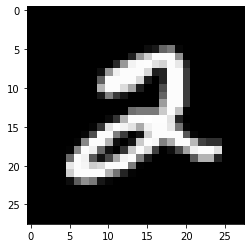

In [27]:
#plotting a data to verify if data is in correct format
image = np.asarray(train_data[5]).squeeze()
image = image.reshape(28, 28)
plt.imshow(image,cmap='gray')
plt.show()

In [28]:
#scaling since the color scale used is 0-255
X=train_data/(255.0)
Y=train_label

In [51]:
#training the model
svc=svm.SVC(kernel='linear',C=1,gamma=0.1).fit(X,Y)

In [52]:
#Scaling test data
X_test=test_data/(255.0)
Y_true=test_label

In [53]:
#Predicting the output by using the svc model created in above cells
Y_predict=svc.predict(X_test)

In [54]:
#Getting accuracy and error rate
acc = metrics.accuracy_score(Y_true, Y_predict)
print("Accuracy : ",acc)
print("Error Rate : ",1-acc)

Accuracy :  0.9404
Error Rate :  0.059599999999999986


In [40]:
#creating a confusion matrix
cf=[[0 for i in range(10)] for j in range(10)]
for i in range(len(Y_predict)):
    cf[Y_true[i]][Y_predict[i]]+=1

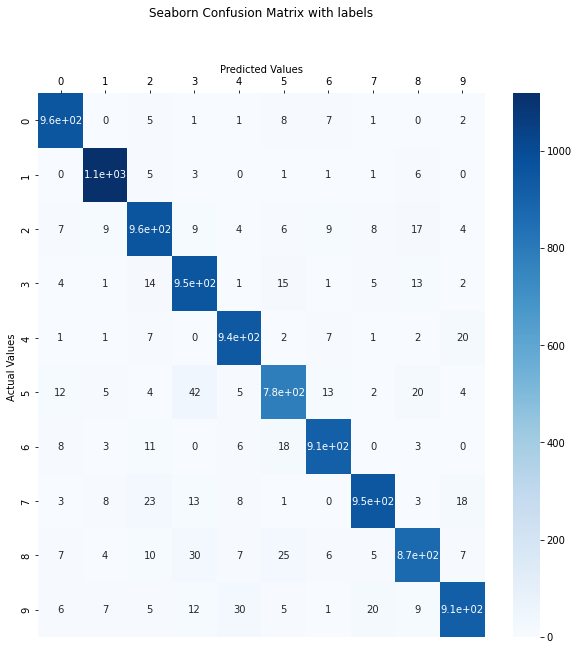

In [41]:
#plotting heatmap using seaborn to visualize confusion matrix
import seaborn as sns
plt.figure(figsize = (10,10))

ax = sns.heatmap(cf, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');


ax.xaxis.set_ticklabels([str(i) for i in range(10)])
ax.xaxis.set_label_position('top')
ax.xaxis.tick_top()
ax.yaxis.set_ticklabels([str(i) for i in range(10)])


plt.show()

predict 6 true 5


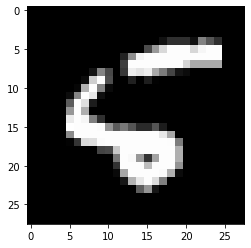

predict 2 true 6


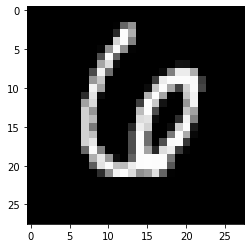

predict 4 true 7


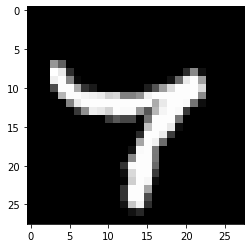

predict 9 true 2


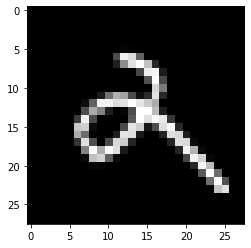

predict 8 true 9


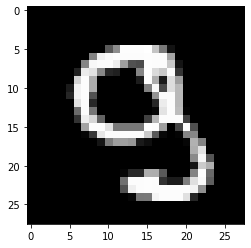

predict 3 true 9


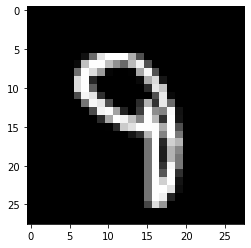

In [42]:
#plotting Few incorrectly predicted values
cnt=0
for i in range(len(Y_predict)):
    if Y_true[i]!=Y_predict[i]:
        image = np.asarray(test_data[i]).squeeze()
        image = image.reshape(28, 28)
        print('predict',Y_predict[i],'true',Y_true[i])
        plt.imshow(image,cmap='gray')
        plt.show()
        cnt+=1
    if cnt==6:
        break
